# Carte des aéroports et aérodromes de France

#### Dépendances

In [9]:
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

In [10]:
from modestk.projection import sph2lcc

#### Fond de carte

In [11]:
ROUTE_BASE_DIR = "/home/human/ilems/mt11-python-cartographie/projet/map/data/"
ROUTE_SHP_DIR = "ROUTE500_3-0__SHP_LAMB93_FXX_2021-11-03/ROUTE500/1_DONNEES_LIVRAISON_2022-01-00175/R500_3-0_SHP_LAMB93_FXX-ED211/"

features_path_dict = {"frontieres": "ADMINISTRATIF/LIMITE_ADMINISTRATIVE.shp",
                      "aerodromes": "RESEAU_ROUTIER/AERODROME.shp",
                      "fer": "RESEAU_FERRE/TRONCON_VOIE_FERREE.shp",
                      "cote": "HABILLAGE/COTE_FRONTIERE.shp",
                      "eau": "HABILLAGE/TRONCON_HYDROGRAPHIQUE.shp"}

In [12]:
features_dict = {}
for key , path in features_path_dict.items():
    features_dict[key] = gpd.read_file(ROUTE_BASE_DIR + ROUTE_SHP_DIR + path)

#### Affichage

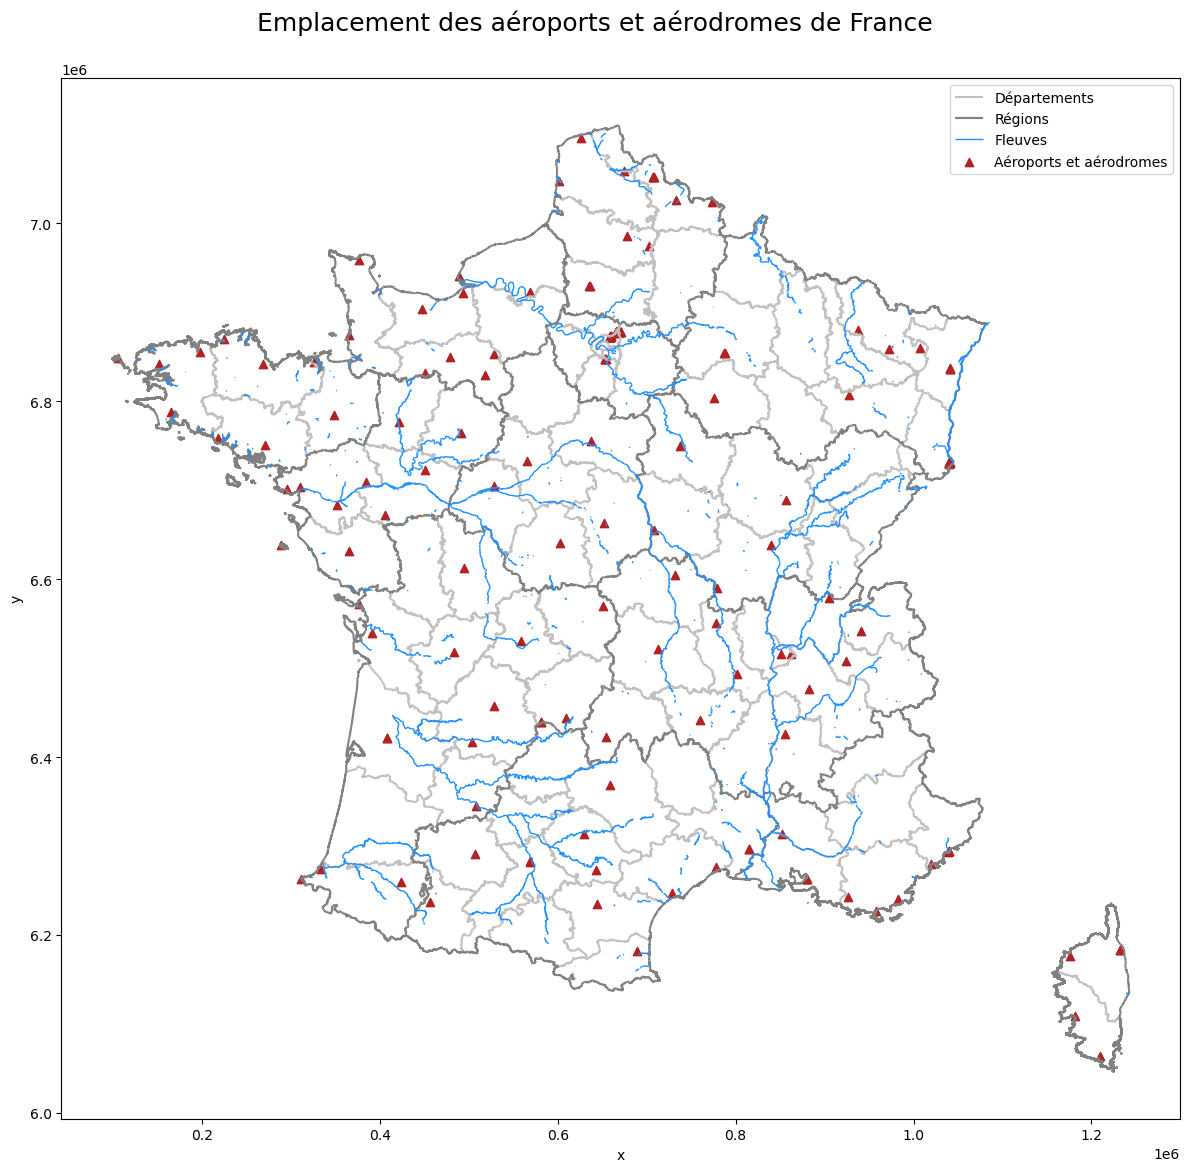

In [13]:
fig, ax = plt.subplots(figsize=(12, 12))

features_dict["frontieres"].query("NATURE  == 'Limite de département'").plot(ax=ax, color="silver", label='Départements')
features_dict["frontieres"].query("NATURE  == 'Limite de région'").plot(ax=ax, color="gray", label='Régions')
features_dict["frontieres"].query("NATURE  in ['Frontière internationale', 'Limite côtière']").plot(ax=ax, color="gray")
features_dict["eau"].query( "LARGEUR == 'Plus de 50 mètres'").plot(ax=ax, color="dodgerblue", linewidth=1, label='Fleuves')
features_dict['aerodromes'].query("TOPONYME != None").plot(ax=ax, color="firebrick", marker="^", linewidth=1, label='Aéroports et aérodromes')

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.legend()

fig.suptitle("Emplacement des aéroports et aérodromes de France", fontsize=18)
fig.tight_layout()
fig.savefig("img/france_aero.svg")

# Cartes des récepteurs

#### Position des stations de réception

In [14]:
gps_dict = {"1": (2.343489415284081,48.85313179527069),
            "2": (2.218672000042794,48.71190699988616),
            "3": (2.171222222222222,48.70938888888889),
            "4": (2.367996649928126,48.72772029632976),
            "5": (2.196247797054214,48.78066589494499),
            "6": (2.112332288629579,48.7502920511761)}

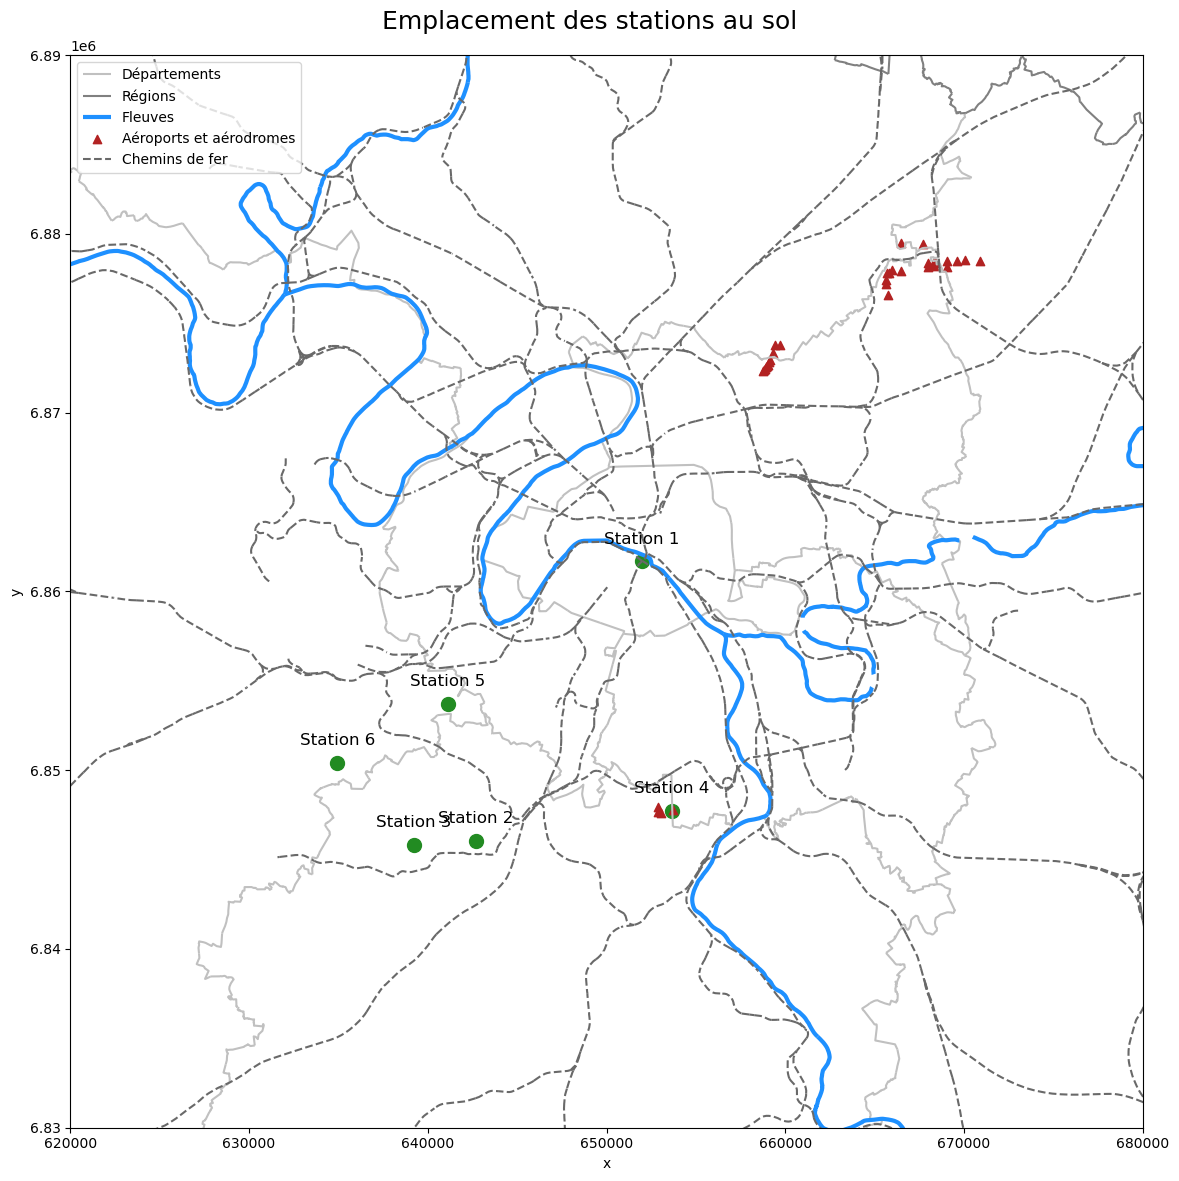

In [15]:
fig, ax = plt.subplots(figsize=(12, 12))

for i, (id_recv, gps_pos) in enumerate(gps_dict.items()):
    x, y = sph2lcc(*gps_pos)
    ax.scatter(x, y, color="forestgreen", marker="o", s=100, alpha=1)
    ax.text(x, y+1000, s="Station {}".format(id_recv), fontsize=12, horizontalalignment='center')

features_dict["frontieres"].query("NATURE  == 'Limite de département'").plot(ax=ax, color="silver", label='Départements')
features_dict["frontieres"].query("NATURE  == 'Limite de région'").plot(ax=ax, color="gray", label='Régions')
features_dict["eau"].query( "LARGEUR == 'Plus de 50 mètres'").plot(ax=ax, color="dodgerblue", linewidth=3, label='Fleuves')
features_dict['aerodromes'].query("TOPONYME != None").plot(ax=ax, color="firebrick", marker="^", linewidth=1, label='Aéroports et aérodromes')
features_dict["fer"].plot(ax=ax, color='dimgray', linestyle='--', label='Chemins de fer')

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_xlim((0.62e6, 0.68e6))
ax.set_ylim((6.83e6, 6.89e6))

handles, labels = ax.get_legend_handles_labels()
by_label = dict(zip(labels, handles))
ax.legend(by_label.values(), by_label.keys(), loc=2)

fig.suptitle("Emplacement des stations au sol", fontsize=18)
fig.tight_layout()
fig.savefig("img/stations.svg")